# Introduction

Machine learning plays a crucial role in various domains, from healthcare to finance and beyond. In this article, we’ll delve into a classic example of a machine-learning application: 
- the Iris Flower Classification. We will explore the dataset, employ different machine-learning models, and discuss the insights gained from this fascinating project. 

- This article contains code and resources for the Iris Flower Classification project. 

- The objective of this project is to classify iris flowers into distinct species based on their sepal and petal measurements.

- The dataset used for training and evaluation is the well-known Iris dataset, consisting of samples from three iris species: Setosa, Versicolor, and Virginia.

### Importing neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('IRIS.csv') ## Load dataset
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head() ## Starting 5 rows showing

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail() ## Last 5 rows showing

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape ## no. of rows and columns

(150, 5)

In [6]:
df.describe() ## some statastical values to describe

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum() ## missng values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.info() ## information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Train-test split

In [9]:
# X = iris.data
# y = iris.target

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Exploratory Data Analysis (EDA)
- The dataset is explored using descriptive statistics and visualizations to understand the distribution and characteristics of the features.
- NULL values are checked to ensure data integrity.

<Axes: xlabel='species', ylabel='count'>

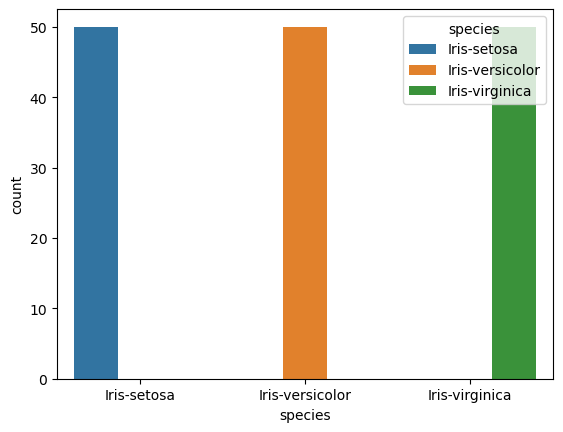

In [11]:
# This will give you the count of each species

sns.countplot(x=df['species'],hue=df['species'])

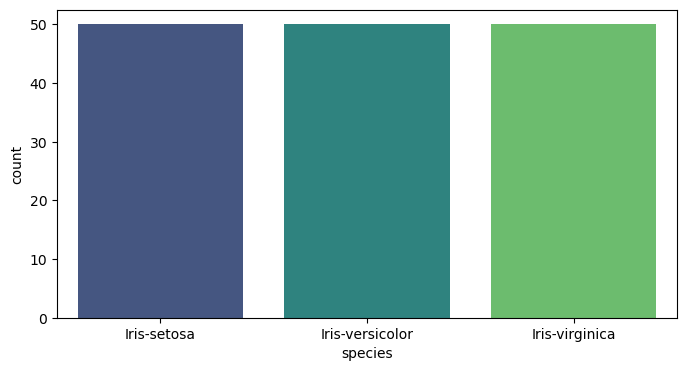

In [42]:
# Countplot for species distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df["species"], palette="viridis")
plt.show()

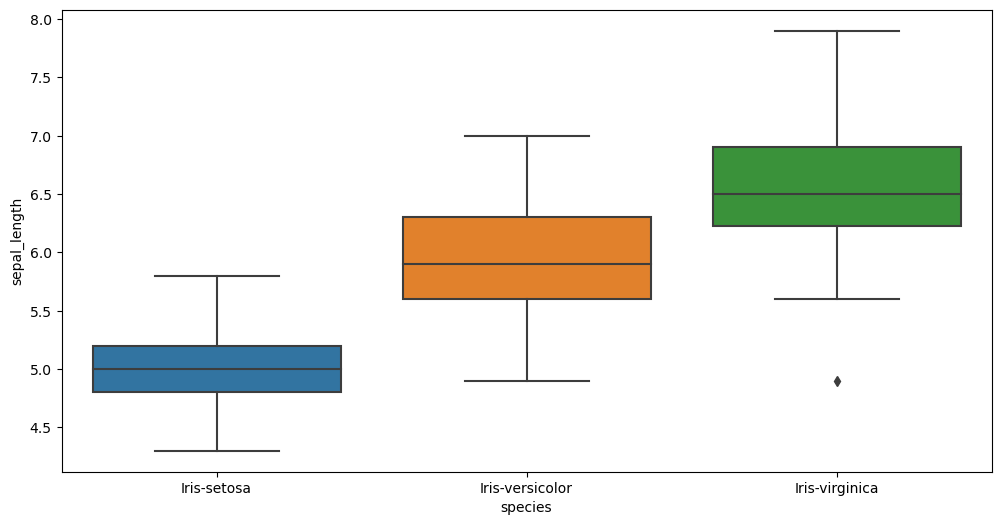

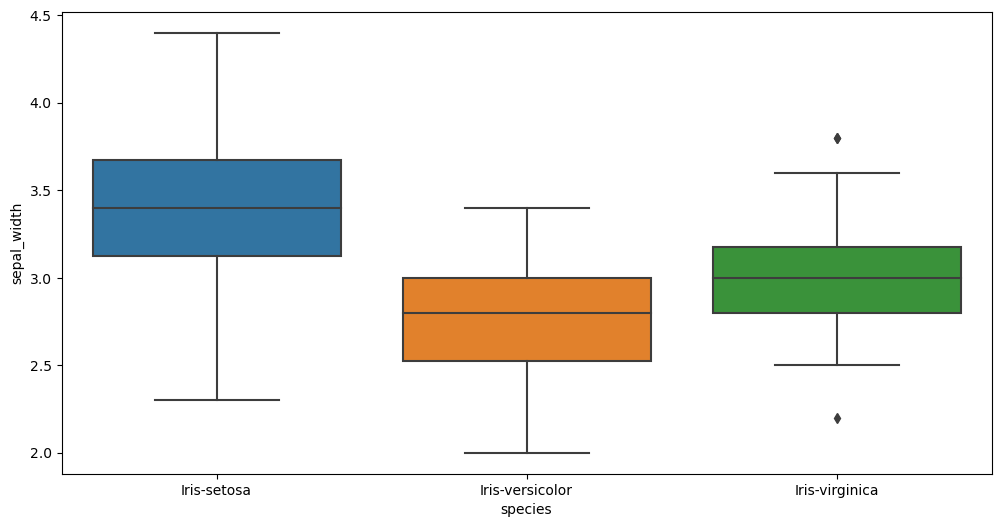

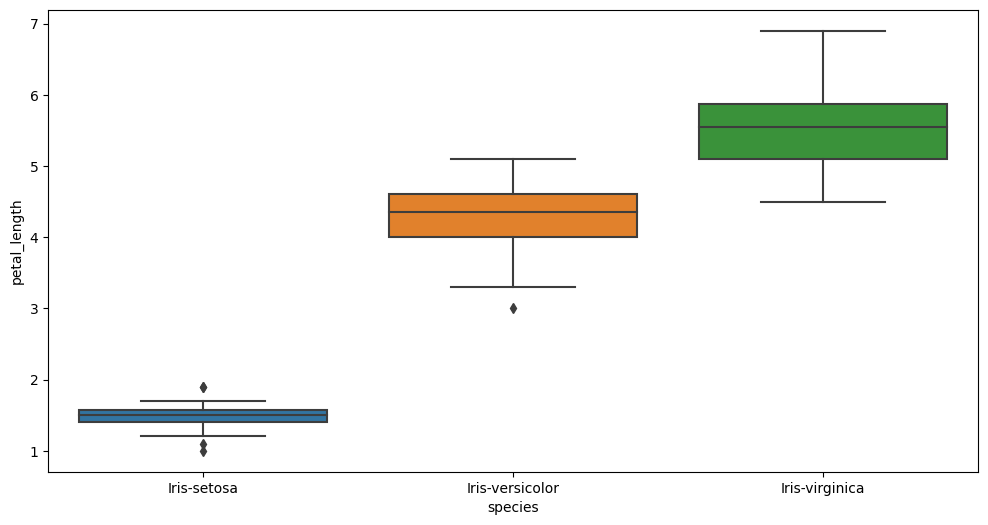

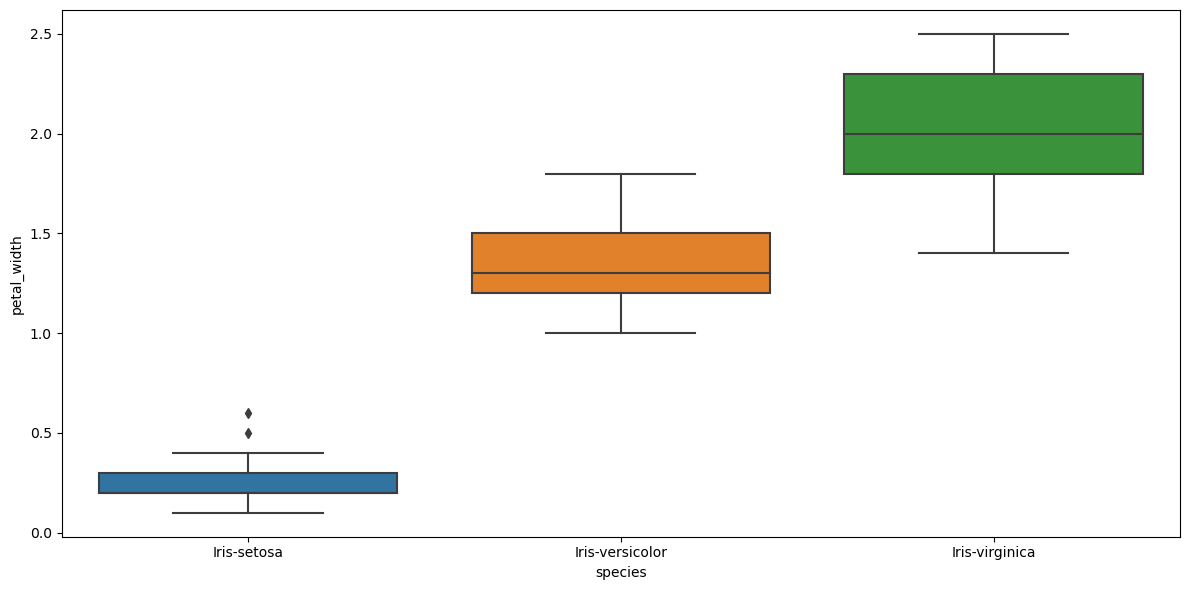

In [49]:
# Boxplots to visualize distributions
plt.figure(figsize=(12, 6))

sns.boxplot(x=df["species"], y=df["sepal_length"])
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["species"], y=df["sepal_width"])

plt.figure(figsize=(12, 6))

sns.boxplot(x=df["species"], y=df["petal_length"])
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["species"], y=df["petal_width"])
plt.tight_layout()

### Feature Visualization
- A pair plot is generated to visualize the relationships between features for each iris species.

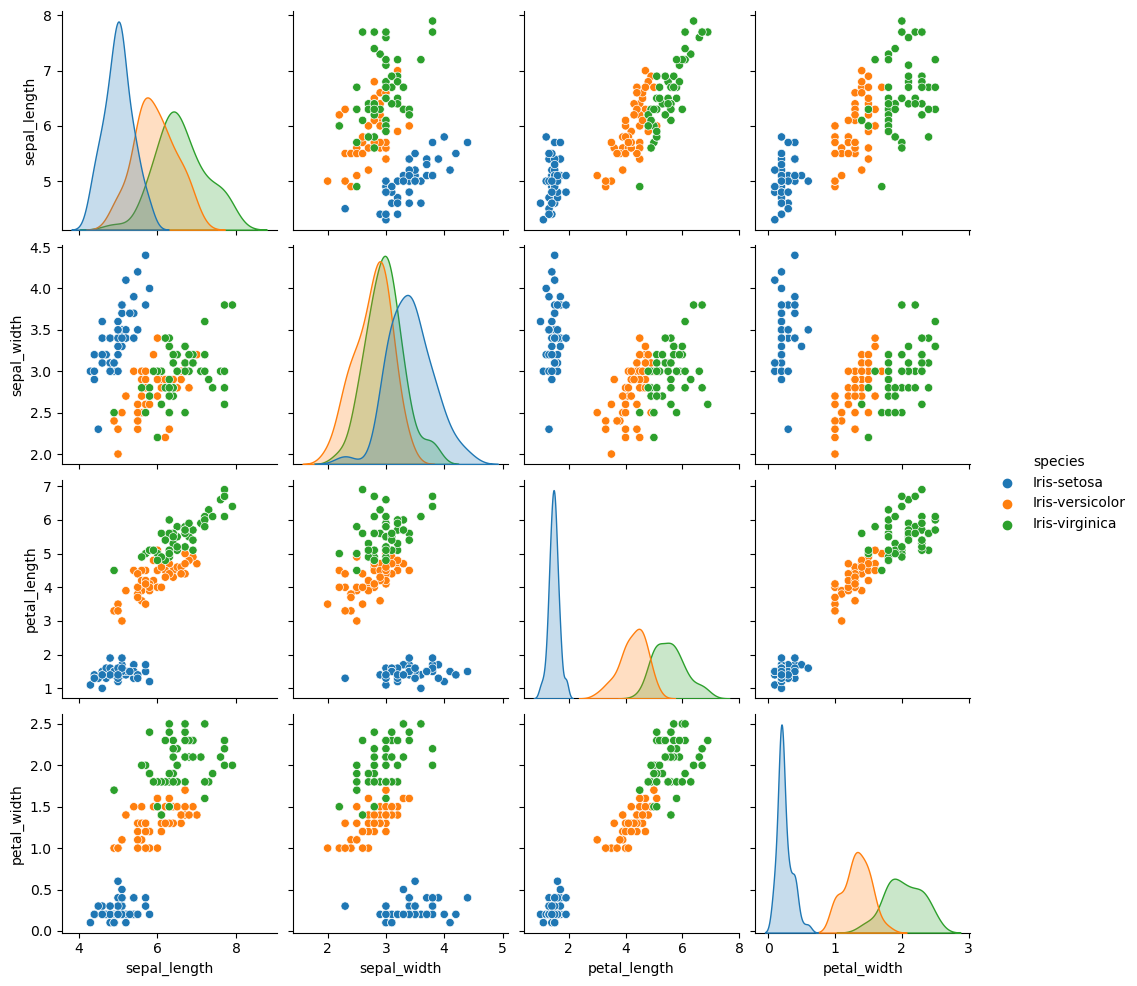

In [14]:
## Visualize the whole dataset

sns.pairplot(df,hue= 'species')
plt.show()

### Machine Learning Models:
We employ various machine learning models to classify the iris flowers based on their features. The models used include:

     - Support Vector Machine (SVM): Achieved an accuracy of 69.67%.
     - k-Nearest Neighbors (k-NN): Achieved an accuracy of 100%.
     - Decision Tree Classifier: Achieved an accuracy of 100%.
     - Random Forest Classifier: After hyperparameter tuning, achieved an accuracy of 100%.
These models are trained and evaluated on a testing set to measure their accuracy. The scikit-learn library simplifies the implementation of these models, making it accessible even for those new to machine learning.

## Training and Testing

In [15]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracies
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"k-NN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

SVM Accuracy: 96.67%
k-NN Accuracy: 100.00%
Decision Tree Accuracy: 100.00%


## Correlation Matrix
A heatmap displays the correlation matrix of the feature set.



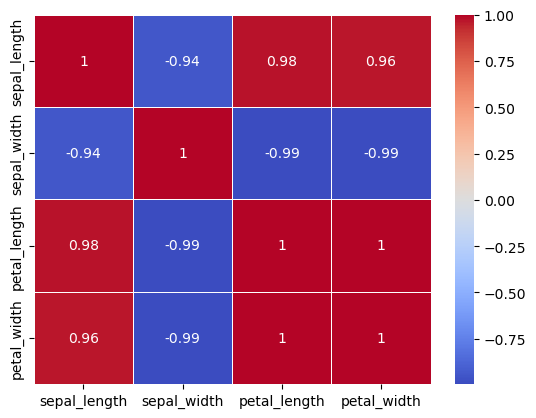

In [36]:
correlation_matrix = df.iloc[:, :4].corr()
sns.heatmap(correlation_matrix.corr(), cmap='coolwarm',annot = True,linewidth=0.5)
plt.show()

### Accuracy of different Models
We can visualize the accuracy of models used using this code.

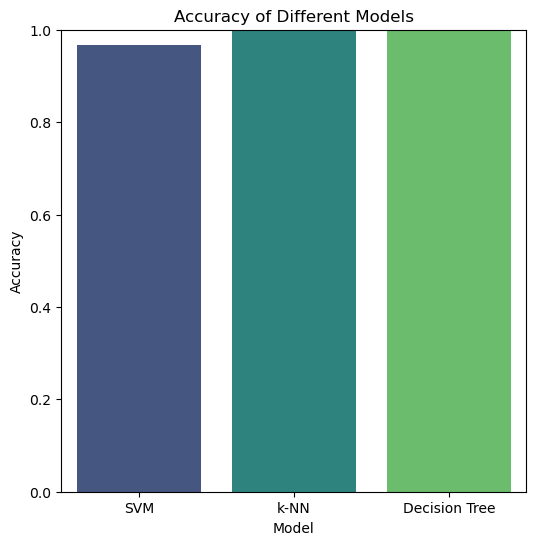

In [39]:
# Create a DataFrame with model names and accuracy values
results_df = pd.DataFrame({
    'Model': ['SVM', 'k-NN', 'Decision Tree'],
    'Accuracy': [accuracy_svm, accuracy_knn, accuracy_dt]
})

# Plot the bar graph
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to the range of 0 to 1 (accuracy range)
plt.show()


## Conclusion
In conclusion, the Iris Flower Classification project provides a hands-on exploration of machine learning techniques. Through data exploration, model training, and visualization, we gain a deeper understanding of the dataset and the capabilities of various classification models.

This project serves as an excellent starting point for those new to machine learning, offering practical insights into data preprocessing, model training, and performance evaluation. Feel free to explore the code, experiment with different models, and contribute to the project’s growth.

#### THANK YOU!!!